In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [3]:
# Import the data set into a dataframe.
insurance = pd.read_csv('insurance.csv')

In [4]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Text(0, 0.5, 'Claim Charges ($)')

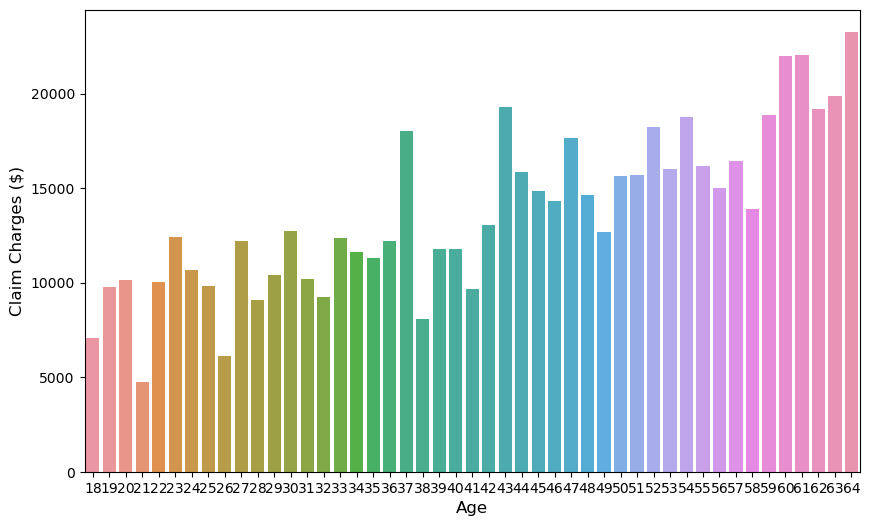

In [7]:
fig = plt.figure(figsize = (10, 6))
sns.barplot(y = 'charges', 
            x = 'age', 
            data = insurance,
            ci = None)

# set labels
plt.xlabel("Age", size=12)
plt.ylabel("Claim Charges ($)", size=12)

Text(0, 0.5, 'Claim Charges ($)')

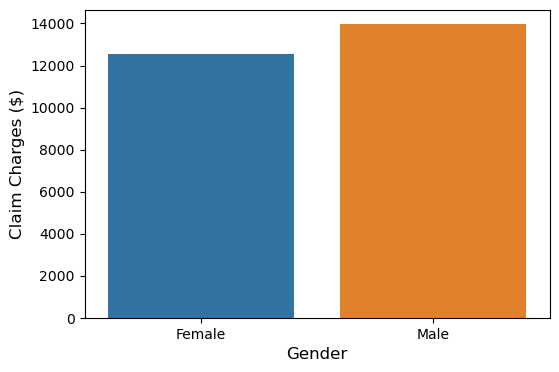

In [8]:
fig = plt.figure(figsize = (6,4))
sns.barplot(y = 'charges', 
            x = 'sex', 
            data = insurance,
            ci = None)
plt.xticks(ticks=[0, 1], labels = ["Female", "Male"])

# set labels
plt.xlabel("Gender", size=12)
plt.ylabel("Claim Charges ($)", size=12)

In [9]:
min(insurance.bmi), max(insurance.bmi)

(15.96, 53.13)

In [10]:
insurance["bmiclass"] = insurance.bmi
insurance.bmiclass = insurance.bmi.round()
insurance.head(5)

,age,sex,bmi,children,smoker,region,charges,bmiclass
0,19,female,27.900,0,yes,southwest,16884.92400,28.0
1,18,male,33.770,1,no,southeast,1725.55230,34.0
2,28,male,33.000,3,no,southeast,4449.46200,33.0
3,33,male,22.705,0,no,northwest,21984.47061,23.0
4,32,male,28.880,0,no,northwest,3866.85520,29.0


In [11]:
insurance["bmiclass"] = insurance.bmi
insurance.bmiclass = insurance.bmi.round()
insurance.head(5)
insurance['bmiclass'] = insurance['bmiclass'].replace([16, 17, 18, 19, 20, 21], 1)
insurance['bmiclass'] = insurance['bmiclass'].replace([22, 23, 24, 25, 26, 27], 2)
insurance['bmiclass'] = insurance['bmiclass'].replace([28, 29, 30, 31, 32, 33], 3)
insurance['bmiclass'] = insurance['bmiclass'].replace([34, 35, 36, 37, 38, 39], 4)
insurance['bmiclass'] = insurance['bmiclass'].replace([40, 41, 42, 43, 44, 45], 5)
insurance['bmiclass'] = insurance['bmiclass'].replace([46, 47, 48, 49, 50, 51, 52, 53], 6)
insurance.head(5)

,age,sex,bmi,children,smoker,region,charges,bmiclass
0,19,female,27.900,0,yes,southwest,16884.92400,3.0
1,18,male,33.770,1,no,southeast,1725.55230,4.0
2,28,male,33.000,3,no,southeast,4449.46200,3.0
3,33,male,22.705,0,no,northwest,21984.47061,2.0
4,32,male,28.880,0,no,northwest,3866.85520,3.0


Text(0, 0.5, 'Claim Charges ($)')

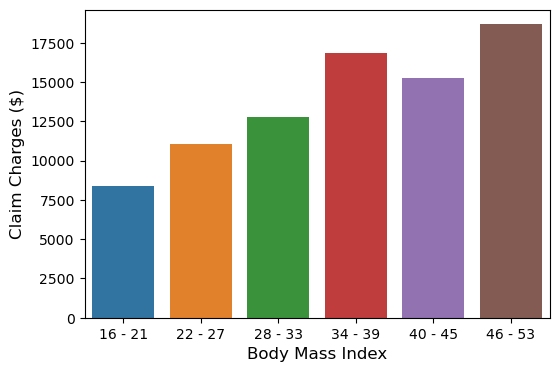

In [12]:
fig = plt.figure(figsize = (6,4))
sns.barplot(y = 'charges', 
            x = 'bmiclass', 
            data = insurance,
            ci = None)
plt.xticks(ticks=[0, 1, 2, 3, 4, 5], labels = ["16 - 21", "22 - 27", "28 - 33", "34 - 39", "40 - 45", "46 - 53"]) 
# set labels

plt.xlabel("Body Mass Index", size=12)
plt.ylabel("Claim Charges ($)", size=12)

Text(0, 0.5, 'Claim Charges ($)')

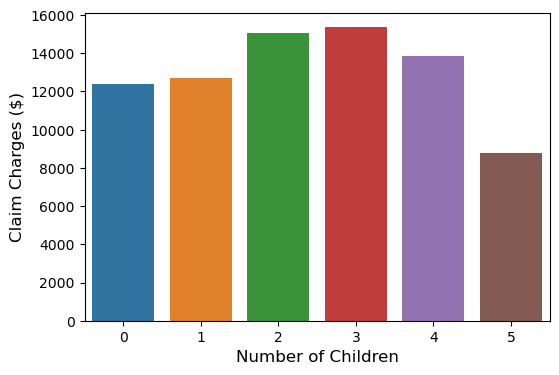

In [13]:
fig = plt.figure(figsize = (6,4))
sns.barplot(y = 'charges', 
            x = 'children', 
            data = insurance,
            ci = None)

# set labels
plt.xlabel("Number of Children", size=12)
plt.ylabel("Claim Charges ($)", size=12)

Text(0, 0.5, 'Claim Charges ($)')

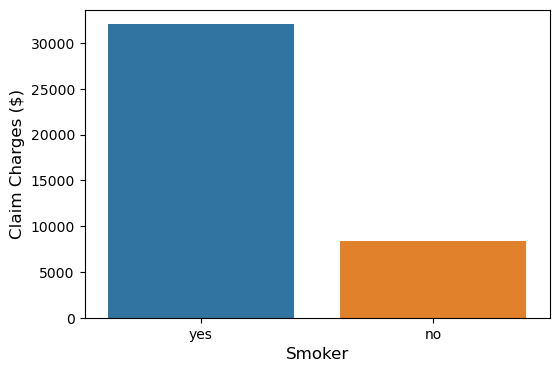

In [14]:
fig = plt.figure(figsize = (6,4))
sns.barplot(y = 'charges', 
            x = 'smoker', 
            data = insurance,
            ci = None)
 
# set labels
plt.xlabel("Smoker", size=12)
plt.ylabel("Claim Charges ($)", size=12)

Text(0, 0.5, 'Claim Charges ($)')

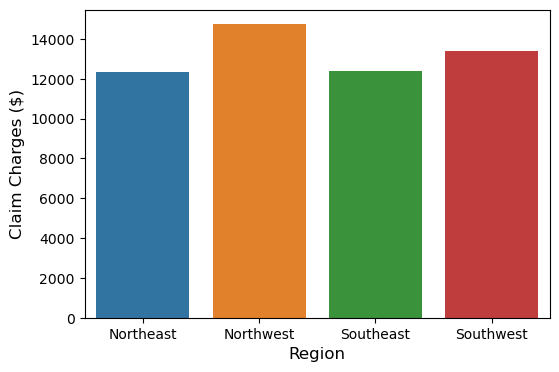

In [15]:
fig = plt.figure(figsize = (6,4))
sns.barplot(y = 'charges', 
            x = 'region', 
            data = insurance,
            ci = None)
plt.xticks(ticks=[0, 1, 2, 3], labels = ["Northeast", "Northwest", "Southeast", "Southwest"]) 

# set labels
plt.xlabel("Region", size=12)
plt.ylabel("Claim Charges ($)", size=12)

In [16]:
min(insurance.charges), max(insurance.charges)

(1121.8739, 63770.42801)

<AxesSubplot:xlabel='charges', ylabel='Count'>

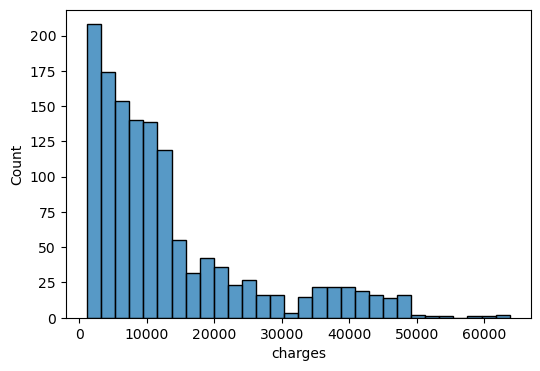

In [17]:
plt.figure(figsize=(6, 4))
sns.histplot(insurance['charges'])

In [18]:
column = 'charges'
insurance[column] = (insurance[column] - insurance[column].min()) / (insurance[column].max() - insurance[column].min())
insurance.head()

,age,sex,bmi,children,smoker,region,charges,bmiclass
0,19,female,27.900,0,yes,southwest,0.251611,3.0
1,18,male,33.770,1,no,southeast,0.009636,4.0
2,28,male,33.000,3,no,southeast,0.053115,3.0
3,33,male,22.705,0,no,northwest,0.333010,2.0
4,32,male,28.880,0,no,northwest,0.043816,3.0


In [19]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
insurance["sex"] = le.fit_transform(insurance["sex"])       # 0 = female, 1 = male
insurance["smoker"] = le.fit_transform(insurance["smoker"]) # 1 = smoker, 2 = non-smoker
insurance["region"] = le.fit_transform(insurance["region"]) # 1 = northwest, 2 = southeast, 3 = southwest, 4 = northeast

<AxesSubplot:>

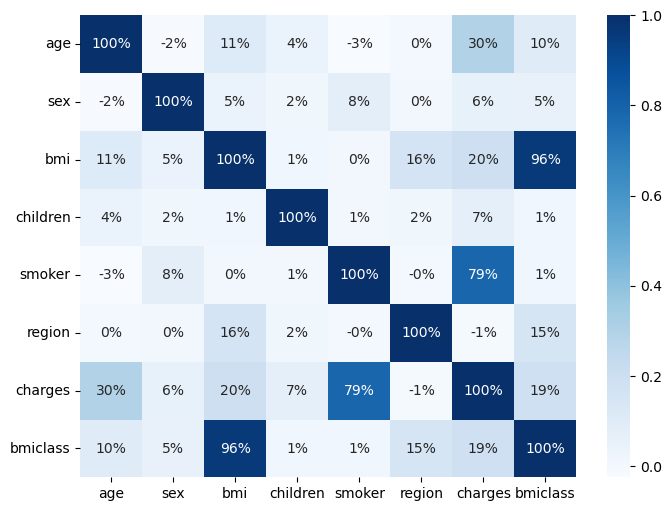

In [20]:
plt.figure(figsize=(8,6))  
sns.heatmap(insurance.corr(), annot=True, fmt='.0%', cmap='Blues')


In [21]:
insurance.drop(['sex', 'region', 'bmiclass'], axis=1, inplace=True)

In [22]:
x_data = insurance.drop('charges', axis = 1)
y_data = insurance['charges']

In [23]:
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x_data, y_data, test_size = 0.25, random_state=42)

In [24]:
sc = StandardScaler()
x_training_data = sc.fit_transform(x_training_data)
x_test_data = sc.fit_transform(x_test_data)

In [37]:
# Create model object. 
model_lr = LinearRegression()
# Train the model on the training data.
model_lr.fit(x_training_data, y_training_data)
# Make predictions on the test data. 
predictions_Lr = model_lr.predict(x_test_data)

In [35]:
rmse = np.sqrt(np.mean(((predictions_lr - y_test_data)**2)))
print(rmse)

0.0949123371964687


In [39]:
# Create model object. 
model_rf = RandomForestRegressor(n_estimators = 10, random_state = 0)
# Train the model on the training data.
model_rf.fit(x_training_data, y_training_data)
# Make predictions on the test data. 
predictions_rf = model_rf.predict(x_test_data)

In [29]:
rmse = np.sqrt(np.mean(((predictions_rf - y_test_data)**2)))
print(rmse)

0.08248579515212681


In [41]:
# Create model object. 
model_sv = SVR()
# Train the model on the training data.
model_sv.fit(x_training_data, y_training_data)
# Make predictions on the test data. 
predictions_sv = model_sv.predict(x_test_data)

In [31]:
rmse = np.sqrt(np.mean(((predictions_sv - y_test_data)**2)))
print(rmse)

0.10010081746903926


In [42]:
models = pd.DataFrame({
    'Model':['Linear Regression', 'Random Forrest', 'Support Vector Machine'],
    'Accuracy_score' :[lr, rf, sv]
})
models
sns.barplot(x='Accuracy_score', y='Model', data=models)

models.sort_values(by='Accuracy_score', ascending=False)

TypeError: Neither the `x` nor `y` variable appears to be numeric.